In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
%matplotlib inline

### Importing Data

- Data Dictionary

In [2]:
import xlrd
import openpyxl

In [3]:
data_dict = pd.read_excel('data/zillow_data_dictionary.xlsx', 'Data Dictionary')
data_dict.tail()

,Feature,Description
53,'landtaxvaluedollarcnt',The assessed value of the land area of the parcel
54,'taxamount',The total property tax assessed for that asses...
55,'assessmentyear',The year of the property tax assessment
56,'taxdelinquencyflag',Property taxes for this parcel are past due as...
57,'taxdelinquencyyear',Year for which the unpaid propert taxes were due


- Train data

In [4]:
train_2016 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
train_2016.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [5]:
train_2017 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])
train_2017.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [6]:
print("Shape Of Train_2016: ",train_2016.shape)
print("Shape Of Train_2017: ",train_2017.shape)

Shape Of Train_2016:  (90275, 3)
Shape Of Train_2017:  (77613, 3)


- Properties Data

In [7]:
prop_2016 = pd.read_csv('data/properties_2016.csv')
prop_2016.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
prop_2017 = pd.read_csv('data/properties_2017.csv')
prop_2017.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("shape Of prop_2016: ", prop_2016.shape)
print("shape Of prop_2017: ", prop_2017.shape)

shape Of prop_2016:  (2985217, 58)
shape Of prop_2017:  (2985217, 58)


#### train & properties merge

In [9]:
merged_2016 = pd.merge(train_2016, prop_2016, on="parcelid", how="left")
merged_2016.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [10]:
merged_2017 = pd.merge(train_2017, prop_2017, on="parcelid", how="left")
merged_2017.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


## EDA

### 1) Train Data

#### number of transactions of each house
- most houses have been sold only one time

In [46]:
(train_2016['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [52]:
(train_2017['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    77218
2      193
3        3
Name: parcelid, dtype: int64

#### log error

In [18]:
np.sort(train_2016["logerror"])

array([-4.605, -4.605, -4.51 , ...,  4.445,  4.52 ,  4.737])

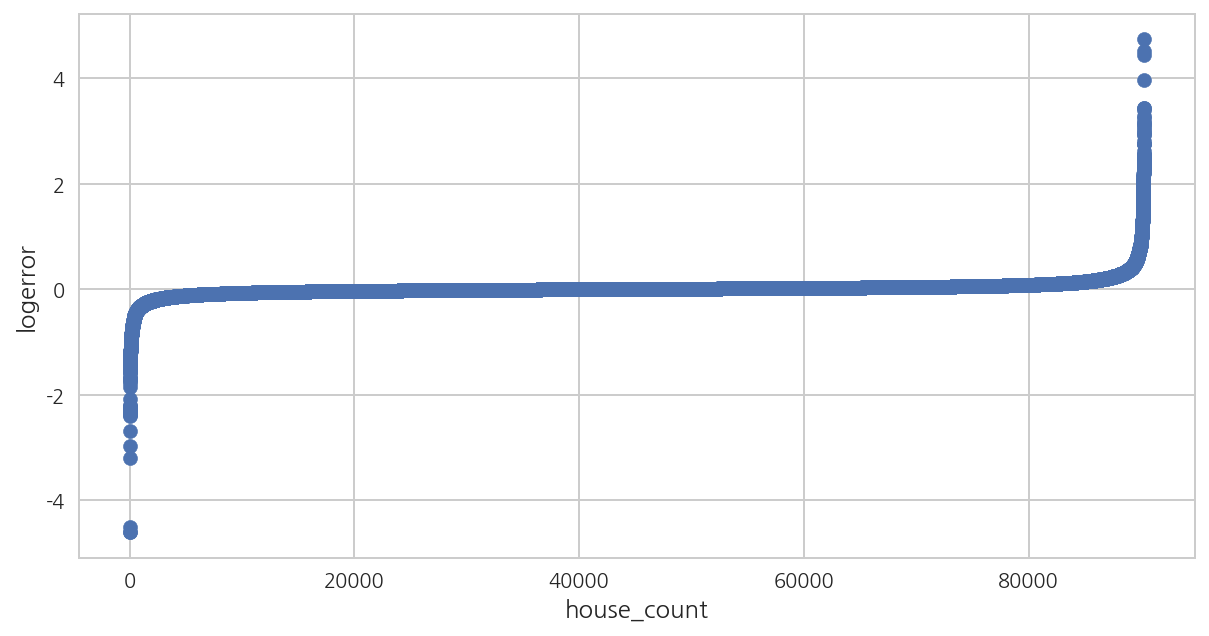

In [21]:
# logerror를 정렬하여 분포를 살펴봄
plt.figure(figsize=(10,5))
plt.scatter(range(train_2016.shape[0]), np.sort(train_2016["logerror"]))
plt.xlabel('house_count', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [36]:
# log error min, max, mean
np.max(train_2016["logerror"]), np.min(train_2016["logerror"]), np.mean(train_2016["logerror"])

(4.737, -4.605, 0.011457219606756682)

In [39]:
ulimit = np.percentile(train_2016.logerror.values, 99)
llimit = np.percentile(train_2016.logerror.values, 1)
ulimit, llimit

(0.4638819999999963, -0.3425)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


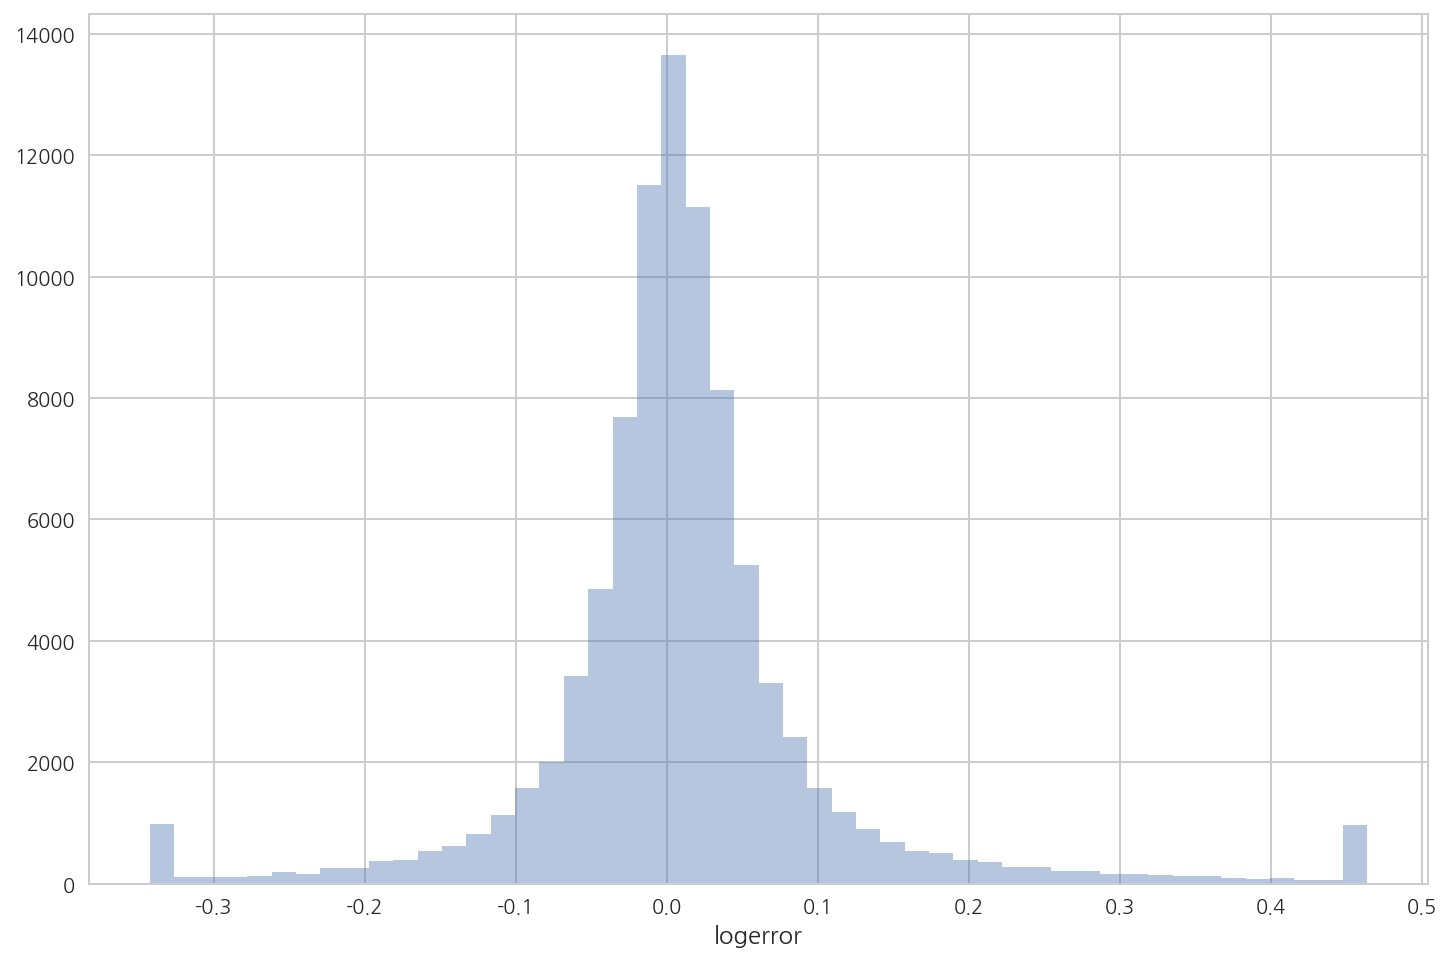

In [44]:
# log error histogram
train_2016['logerror'].ix[train_2016['logerror']>ulimit] = ulimit
train_2016['logerror'].ix[train_2016['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_2016["logerror"], bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### 2) Properties Data

#### Missing data

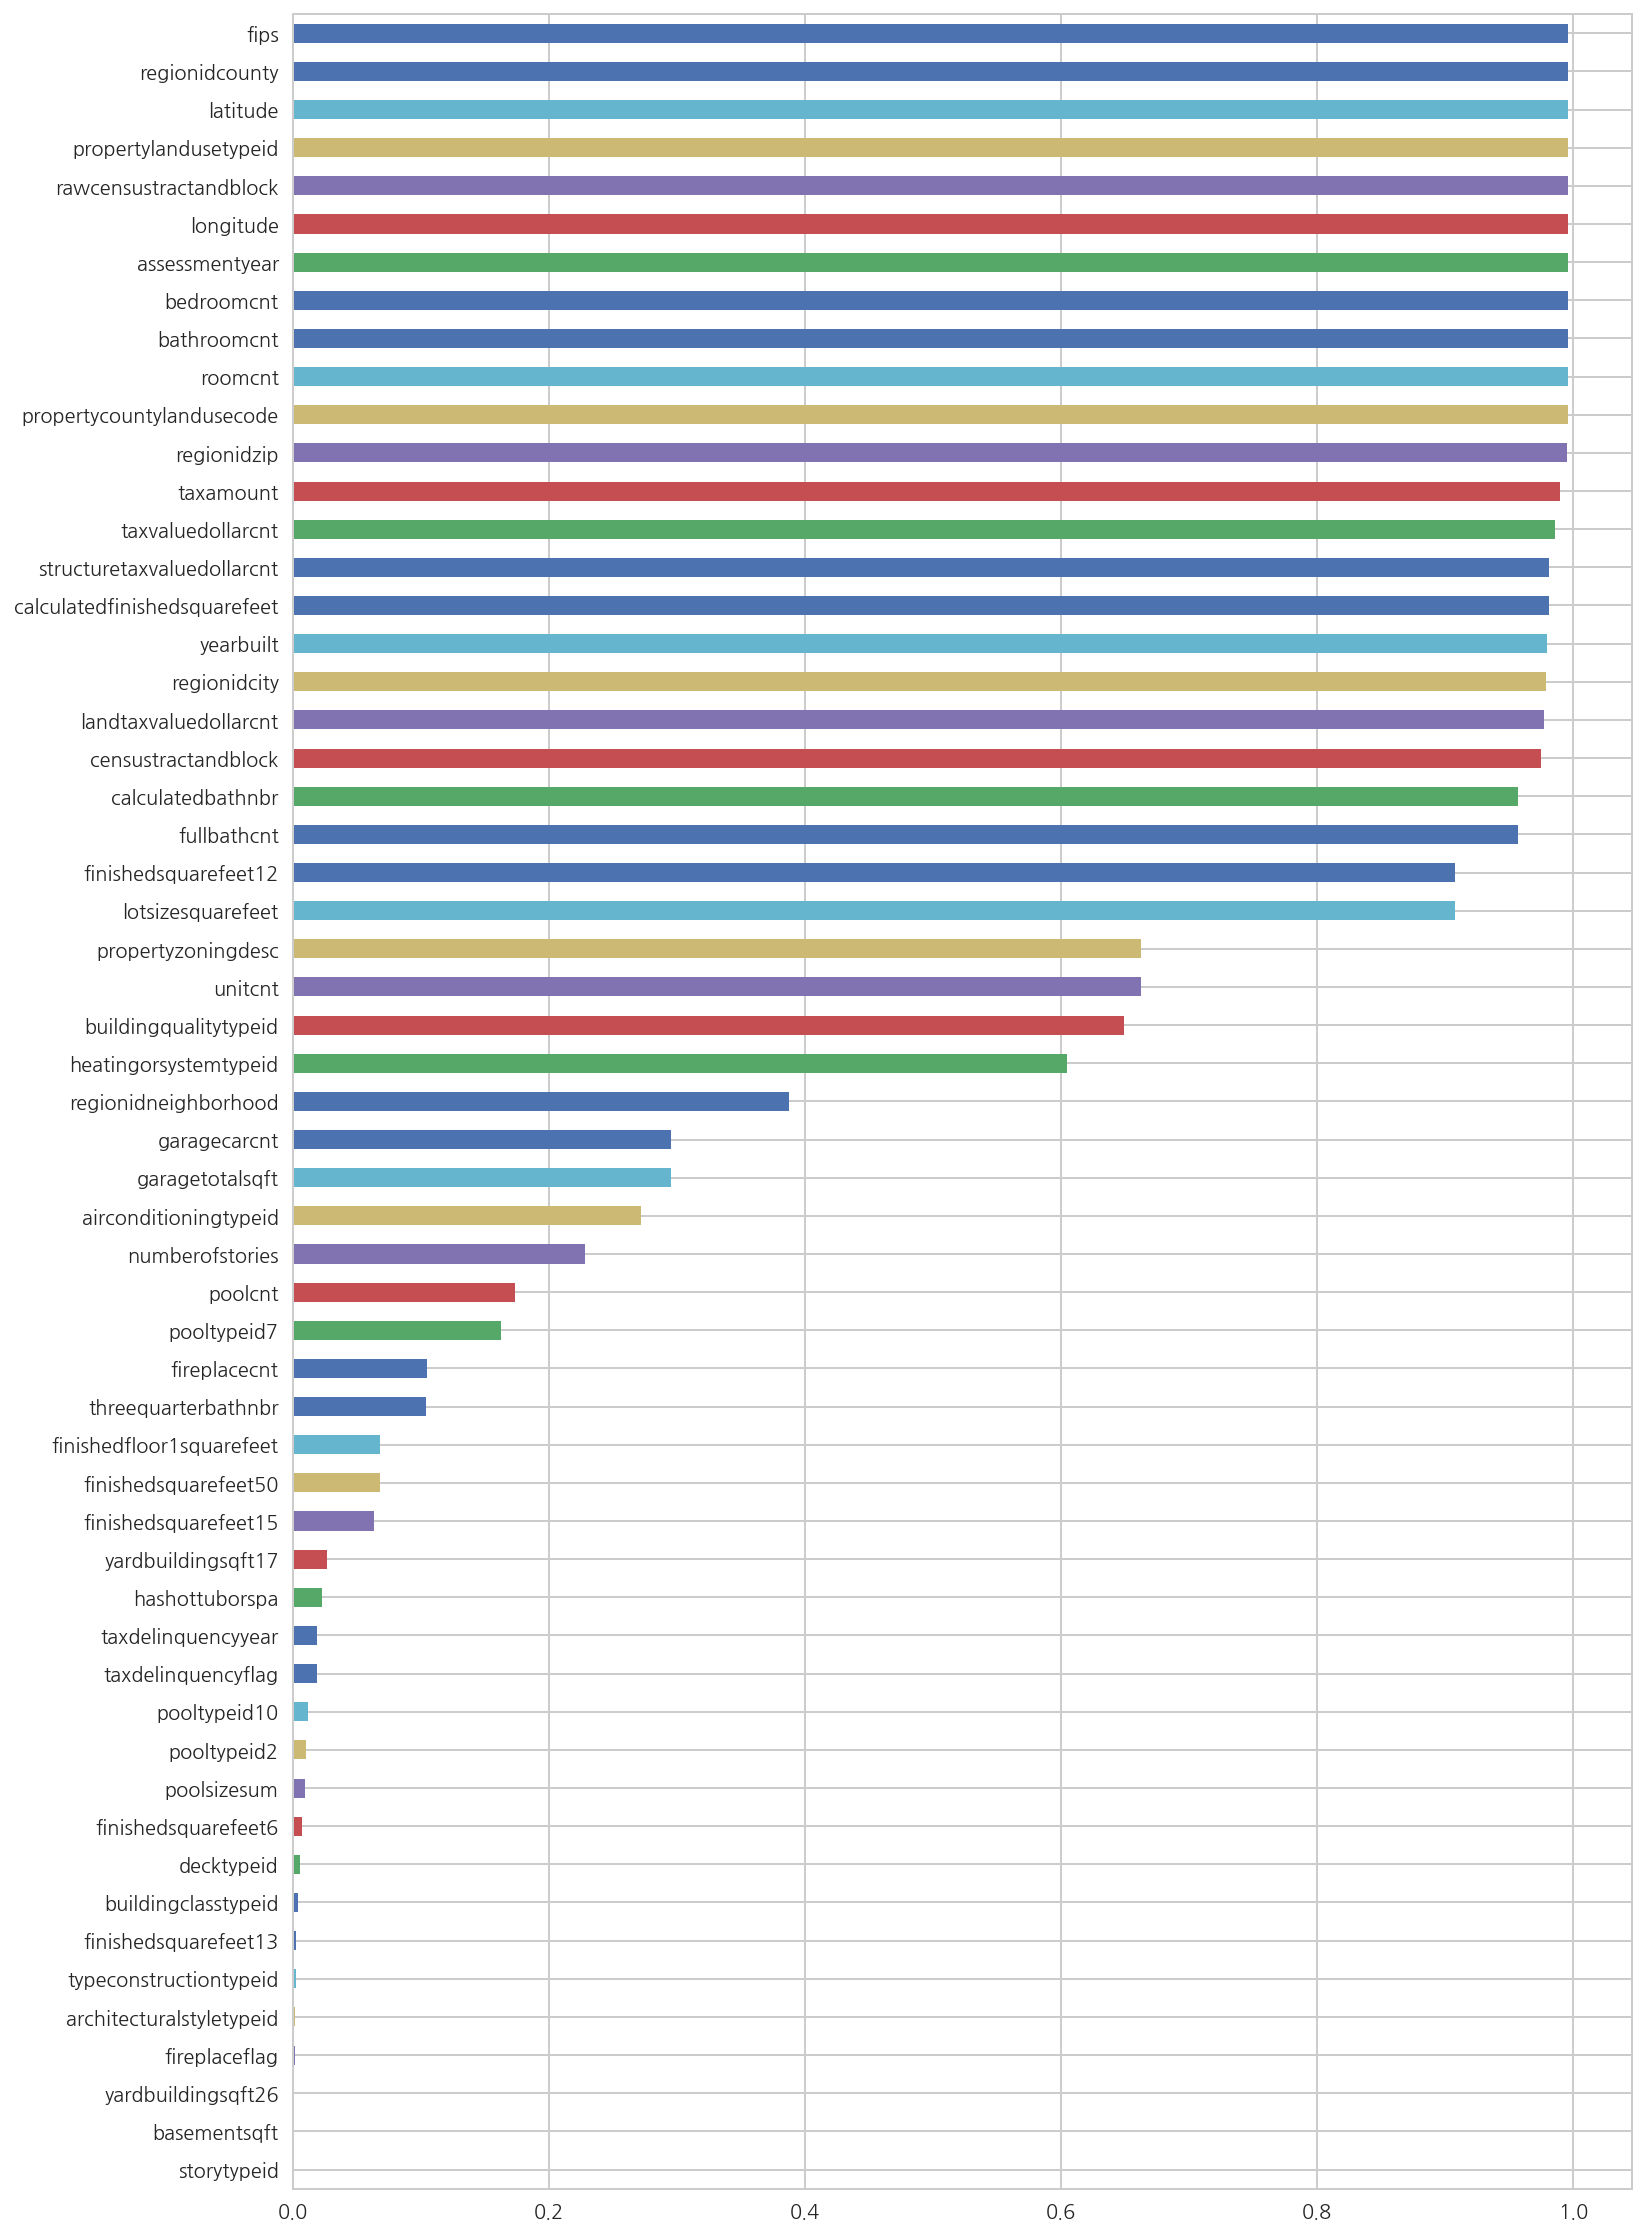

In [11]:
plt.figure(figsize=(12,20))
prop_2016.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.show()

In [62]:
missing_2016 = prop_2016.isnull().sum(axis=0).reset_index()
missing_2016.columns = ['column_name', 'missing_count']
missing_2016 = missing_2016.ix[missing_df['missing_count']>0]
missing_2106 = missing_2016.sort_values(by='missing_count')
missing_2016

MemoryError: 